In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading the dataset

In [49]:
train=pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [50]:
train.head() # 28x28 = 784 pixels i.e features

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [51]:
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

Rescaling the pixel intensity values between 0-1 by dividing the sample by 255 (Since grayscale values ranges from 0-255)

In [52]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [53]:
y_train.shape

(27455,)

# Creating a Model using Sequential API

- Sequential API allows you to create models layer-by-layer by stacking them.
- In other words it is pretty much similar feed-forward neural networks.

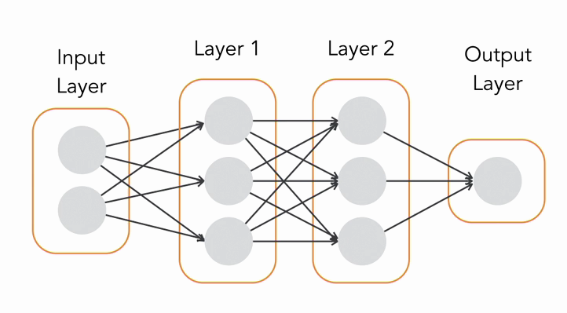

In [55]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the Model

In [63]:
logs=model.fit(x_train,y_train,epochs=30,validation_split=0.2)

In [ ]:
# evaluating model on test data
model.evaluate(x_test,y_test)

In [ ]:
pd.DataFrame(logs.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

We can infer from the graph that the validation **accuracy** is on gradual *inclination* and the **loss** is *declining* steadily as expected.